In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import numpy as np

In [4]:
tf.__version__

'2.0.0'

In [5]:
if tf.test.is_gpu_available():
    print("\nYour GPU is available to TensorFlow\n")
else:
    print("\nYour GPU is NOT available to TensorFlow\n")



Your GPU is available to TensorFlow



In [6]:
print(('Is your GPU available for use?\n{0}').format(
    'Yes, your GPU is available: True' if tf.test.is_gpu_available() == True else 'No, your GPU is NOT available: False'
))


Is your GPU available for use?
Yes, your GPU is available: True


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomNormal
# import math
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Load and prepare the MNIST dataset-
mnist = tf.keras.datasets.mnist

In [9]:
# Load data from TensorFlow 2.0-
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize dataset-
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Cast dataset to floating type-
X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [ ]:
# Perform one-hot encoding for multi-class classification-
n_classes = 10

y_train_ohe = tf.keras.utils.to_categorical(y_train, n_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, n_classes)

In [12]:
# Reshape training and testing sets-
X_train = tf.reshape(X_train, shape=(X_train.shape[0], 28, 28, 1))
X_test = tf.reshape(X_test, shape = (X_test.shape[0], 28, 28, 1))

print("\nX_train.shape = {0} & y_train_ohe.shape = {1}".format(X_train.shape, y_train_ohe.shape))
print("X_test.shape = {0} & y_test_ohe.shape = {1}\n".format(X_test.shape, y_test_ohe.shape))


X_train.shape = (60000, 28, 28, 1) & y_train_ohe.shape = (60000, 10)
X_test.shape = (10000, 28, 28, 1) & y_test_ohe.shape = (10000, 10)



In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe))

In [ ]:
train_dataset = train_dataset.shuffle(20000).batch(128)

Create CNN for LeNet-5 architecture for MNIST dataset

In [ ]:
# Define the LeNet-5 CNN model for MNIST classification:

model = Sequential()

# Convolutional layer-1
model.add(Conv2D(filters = 6, kernel_size = (5, 5),
    strides = (1, 1), activation = 'relu', kernel_initializer=tf.initializers.glorot_normal),
    input_shape = (28, 28, 1)))

# Average pooling layer-1
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))

# Convolutional layer-2
model.add(Conv2D(filters = 16, kernel_size = (5, 5),
    strides = (1, 1), activation = 'relu',
    kernel_initializer=tf.initializers.glorot_normal)))

# Average pooling layer-2
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))

# Flatten the output-
model.add(layers.Flatten())

# Fully connected layer-
model.add(layers.Dense(units = 120, activation = 'relu',
  kernel_initializer=tf.initializers.glorot_normal)))

# Another flattening of the previous layer-
model.add(layers.Flatten())

# Fully connected layer-
model.add(layers.Dense(units = 84, activation = 'relu'
  kernel_initializer=tf.initializers.glorot_normal)))

# Output layer-
model.add(layers.Dense(units = 10, activation = 'softmax'))


In [ ]:
# Define an optimizer for the model to choose-
optimizer_SGD = tf.keras.optimizers.SGD(lr = 0.001, momentum=0.0, decay = 0.0)

In [ ]:
model.compile(
    optimizer=optimizer_SGD,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
    )

In [ ]:
# Use early stopping-
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience = 3,
    restore_best_weights = True)

In [19]:
# Train defined model-
history = model.fit(
	x = X_train, y = y_train_ohe,
	epochs = 100, callbacks=[callback],
  validation_data = [X_test, y_test_ohe]
	)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping?version=stable

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 245us/sample - loss: 2.2729 - accuracy: 0.1347 - val_loss: 2.2170 - val_accuracy: 0.2529
Epoch 2/100
60000/60000 [==============================] - 8s 134us/sample - loss: 1.6955 - accuracy: 0.5599 - val_loss: 0.7774 - val_accuracy: 0.8057
Epoch 3/100
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5702 - accuracy: 0.8370 - val_loss: 0.4338 - val_accuracy: 0.8690
Epoch 4/100
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4120 - accuracy: 0.8777 - val_loss: 0.3589 - val_accuracy: 0.8933
Epoch 5/100
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3538 - accuracy: 0.8938 - val_loss: 0.3125 - val_accuracy: 0.9082
Epoch 6/100
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3173 - accuracy: 0.9049 - val_loss: 0.2863 - val_accuracy: 0.9103
Epoch 7/100
60000/60000 [==================

In [ ]:
score = model.evaluate(X_test, y_test_ohe, verbose=0)

In [22]:
print("\nLeNet-5 CNN MNIST original model metrics on test dataset are:")
print("loss = {0:.4f} & accuracy = {1:.4f}\n".format(score[0], score[1]))


LeNet-5 CNN MNIST original model metrics on test dataset are:
loss = 0.0660 & accuracy = 0.9795



In [24]:
print("\nOriginal LenNet-5 CNN on MNIST dataset is:\n")
print(model.summary())


Original LenNet-5 CNN on MNIST dataset is:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
flatten_1 (

In [ ]:
# Make predictions using trained model-
y_pred = model.predict_classes(X_test)

In [28]:
y_pred.shape

(10000,)

In [ ]:
# Get trained model metrics-
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')

In [30]:
print("\nTrained LeNet-5 CNN model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Trained LeNet-5 CNN model metrics are:
accuracy = 0.9795, precision = 0.9794 & recall = 0.9793



In [36]:
len(history.history['accuracy'])

69

The CNN was trained for 69 epochs after which earlystopping stopped training as 'val_loss' stopped increasing with a patience of 3

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

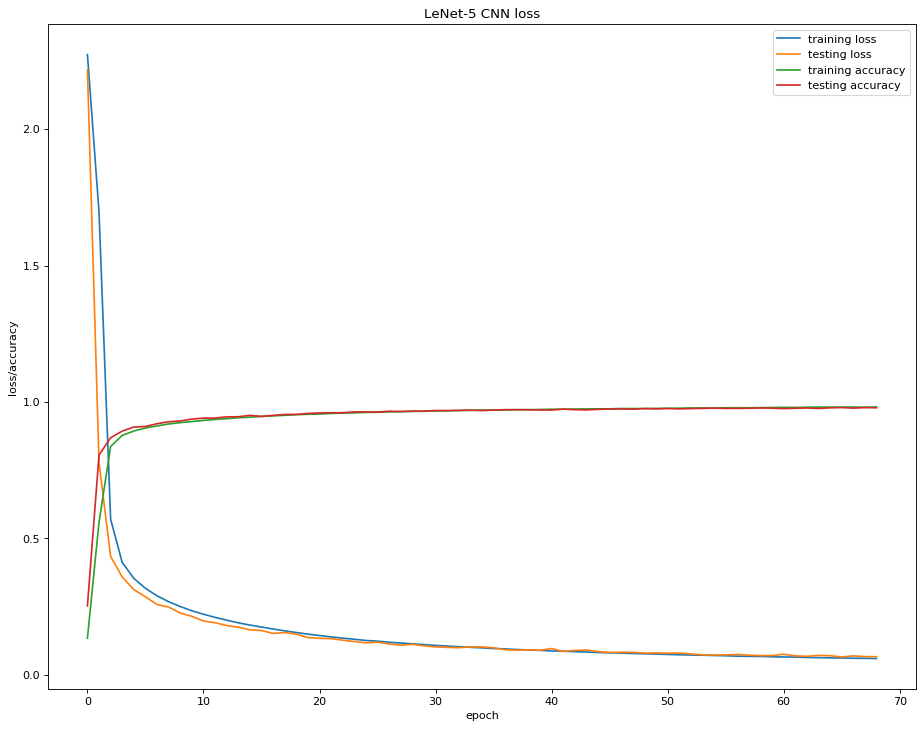

In [42]:
# We can visualize the loss over epochs to get an overview-
fig=plt.figure(figsize=(14, 11), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'testing loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'testing accuracy')

plt.title('LeNet-5 CNN loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
plt.legend(loc = 'upper right')
plt.show()


In [ ]:
!pip install tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity

In [45]:
batch_size = 128
epochs = len(history.history['accuracy'])

print("\nOriginal CNN trained for {0} epochs\n".format(epochs))


Original CNN trained for 69 epochs



In [46]:
# end_step = np.ceil(1.0 * X_train / batch_size).astype(np.int32) * epochs
end_step = np.ceil(X_train.shape[0] / 128) * epochs
end_step

32361.0

In [ ]:
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
  initial_sparsity = 0.0, final_sparsity = 0.9,
  begin_step = 2000, end_step = end_step,
  frequency = 100)

In [48]:
model_pruning = tfmot.sparsity.keras.prune_low_magnitude(model, pruning_schedule= pruning_schedule)

Instructions for updating:
Please use `layer.add_weight` method instead.


In [49]:
# Compile the defined pruned model-
model_pruning.compile(optimizer=optimizer_SGD,
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics = ['accuracy'])

"""
pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])
"""

"\npruned_model.compile(\n    loss=tf.keras.losses.categorical_crossentropy,\n    optimizer='adam',\n    metrics=['accuracy'])\n"

In [ ]:
callbacks = [
    sparsity.UpdatePruningStep()
    # sparsity.PruningSummaries(log_dir=logdir, profile_batch=0)
]

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [51]:
# Train defined model-
history_pruned = model_pruning.fit(
    x = X_train, y = y_train_ohe,
    batch_size = batch_size,
    epochs = 100, callbacks = callbacks,
    validation_data = [X_test, y_test_ohe]
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0652 - val_accuracy: 0.9797
Epoch 2/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.0647 - val_accuracy: 0.9801
Epoch 3/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0666 - val_accuracy: 0.9797
Epoch 4/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0563 - accuracy: 0.9835 - val_loss: 0.0647 - val_accuracy: 0.9801
Epoch 5/100
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 6/100
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.0654 - val_accuracy: 0.9796
Epoch 7/100
60000/60000 [===================

In [ ]:
score = model_pruning.evaluate(X_test, y_test_ohe, verbose = 0)

In [53]:
print("\nLeNet-5 CNN MNIST pruned model metrics on test dataset are:")
print("loss = {0:.4f} & accuracy = {1:.4f}\n".format(score[0], score[1]))


LeNet-5 CNN MNIST pruned model metrics on test dataset are:
loss = 0.0579 & accuracy = 0.9830



In [57]:
print("\nPruned LenNet-5 CNN on MNIST dataset is:\n")
print(model_pruning.summary())


Pruned LenNet-5 CNN on MNIST dataset is:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d ( (None, 24, 24, 6)         308       
_________________________________________________________________
prune_low_magnitude_average_ (None, 12, 12, 6)         1         
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 8, 8, 16)          4818      
_________________________________________________________________
prune_low_magnitude_average_ (None, 4, 4, 16)          1         
_________________________________________________________________
prune_low_magnitude_flatten  (None, 256)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 120)               61562     
_________________________________________________________________
prune_low_mag

In [58]:
print("\nOriginal LenNet-5 CNN on MNIST dataset is:\n")
print(model.summary())


Original LenNet-5 CNN on MNIST dataset is:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
flatten_1 (

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2

https://medium.com/@rajath95/how-to-save-and-upload-deep-learning-machine-learning-models-in-google-colab-using-google-drive-eb2901937ae


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model.save('LeNet-5_CNN_Original_model_MNIST.h5')

In [ ]:
model.save_weights("LeNet-5_CNN_Original_model_MNIST_weights.h5", overwrite=True)

In [ ]:
model_pruning.save('LeNet-5_CNN_Pruned_model_MNIST.h5')

In [ ]:
# Recreate the model from saved file-

# Recreate the exact same model, including its weights and the optimizer
orig_model = tf.keras.models.load_model('LeNet-5_CNN_Original_model_MNIST.h5')

# Show the model architecture
orig_model.summary()

In [ ]:
# Check accuracy and loss of restored/loaded model-
loss, acc = orig_model.evaluate(X_test,  y_test_ohe, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

This technique saves everything:

    The weight values
    The model's configuration(architecture)
    The optimizer configuration

Keras saves models by inspecting the architecture. Currently, it is not able to save TensorFlow optimizers (from tf.train). When using those you will need to re-compile the model after loading, and you will lose the state of the optimizer.

https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model

In [ ]:
for n, layer in enumerate(model.trainable_variables):
  print("layer {0} has shape = {1}".format(n + 1, layer.shape))

layer 1 has shape = (5, 5, 1, 6)
layer 2 has shape = (6,)
layer 3 has shape = (5, 5, 6, 16)
layer 4 has shape = (16,)
layer 5 has shape = (256, 120)
layer 6 has shape = (120,)
layer 7 has shape = (120, 84)
layer 8 has shape = (84,)
layer 9 has shape = (84, 10)
layer 10 has shape = (10,)


In [ ]:
for n, layer in enumerate(model_pruning.trainable_variables):
  print("layer {0} has shape = {1}".format(n + 1, layer.shape))

layer 1 has shape = (5, 5, 1, 6)
layer 2 has shape = (6,)
layer 3 has shape = (5, 5, 6, 16)
layer 4 has shape = (16,)
layer 5 has shape = (256, 120)
layer 6 has shape = (120,)
layer 7 has shape = (120, 84)
layer 8 has shape = (84,)
layer 9 has shape = (84, 10)
layer 10 has shape = (10,)


In [ ]:
print(model.trainable_variables[1].numpy())

[-0.02855234  0.05989161 -0.0607013  -0.00576936 -0.00045072  0.1610433 ]


In [ ]:
print(model_pruning.trainable_variables[1].numpy())

[-0.02855234  0.05989161 -0.0607013  -0.00576936 -0.00045072  0.1610433 ]


In [ ]:
print(model.trainable_variables[9].numpy())

[-0.06838122  0.11613953 -0.0261348  -0.07213172  0.01736846  0.00848707
  0.0143916   0.0469756  -0.04419191  0.00747634]


In [ ]:
print(model_pruning.trainable_variables[9].numpy())

[-0.06838122  0.11613953 -0.0261348  -0.07213172  0.01736846  0.00848707
  0.0143916   0.0469756  -0.04419191  0.00747634]
